# Wacken Statistiken

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import pylab as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [59]:
# Anzahl der Festivals
x = np.arange(1990,2018)-1989
# Preis
y = np.array([6.14 , 7.67 , 17.90, 23.01, 19.94, 20.05, 25.05, 35.28, 
              35.28, 40.39, 40.90, 50.62, 50.00, 50.00, 68.00, 79.00, 
              79.00, 99.00, 109.00, 120.00, 120.00, 120.00, 140.00, 
              140.00, 160.00, 170.00, 180.00, 220.00])

In [60]:
# Fit von ein paar Modellen:
l_par = np.polyfit(x,y,1)
p_par = np.polyfit(x,y,2)
def func(x, a, b, c):
    return a * np.exp(b * x) + c
p_exp, pconv = curve_fit(func, x, y)
# Kurven erzeugen
lin = l_par[0]*x + l_par[1]
par = p_par[0]*x**2 + p_par[1]*x + p_par[2]
exp = func(x,p_exp[0],p_exp[1],p_exp[2])

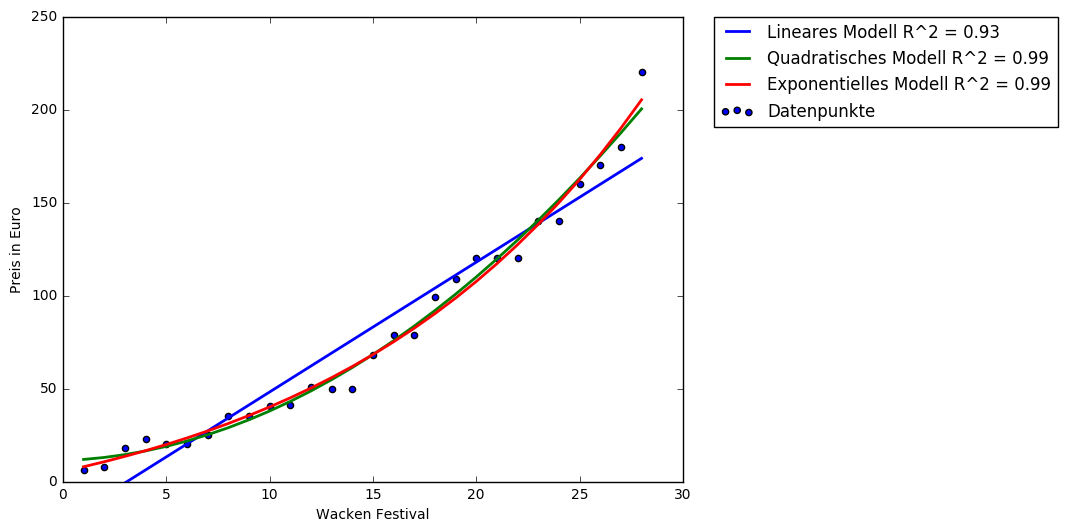

In [62]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x,y, label='Datenpunkte')
ax.set_xlabel('Wacken Festival')
ax.set_ylabel('Preis in Euro')
ax.set_xlim([0,30])
ax.set_ylim([0,250])
# Plotte die Modelle
ax.plot(x,lin,label='Lineares Modell R^2 = %.2f' % r2_score(y,lin), linewidth=2)
ax.plot(x,par,label='Quadratisches Modell R^2 = %.2f' % r2_score(y,par), linewidth=2)
ax.plot(x,exp,label='Exponentielles Modell R^2 = %.2f' % r2_score(y,exp), linewidth=2)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [72]:
# Vorausgesagte Kosten für Wacken 2017 (das 28.)
x_ = 28
print('Linearer Preisanstieg:\t\t%.2f' % (l_par[0]*x_ + l_par[1]))
print('Quadratischer Preisanstieg:\t%.2f' % (p_par[0]*x_**2 + p_par[1]*x_ + p_par[2]))
print('Exponentieller Preisanstieg:\t%.2f' % (func(x_,p_exp[0],p_exp[1],p_exp[2])))

Linearer Preisanstieg:		173.74
Quadratischer Preisanstieg:	200.33
Exponentieller Preisanstieg:	205.20
